# Pràctica Regressió Lineal

Mean:  [6.30723465]
Std:  [0.72156238]


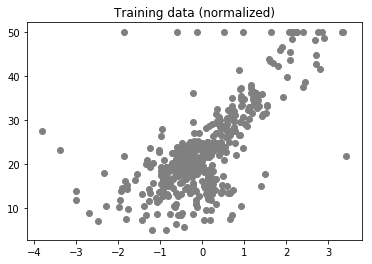

Theta:  [[24.27006276  6.98783117]]


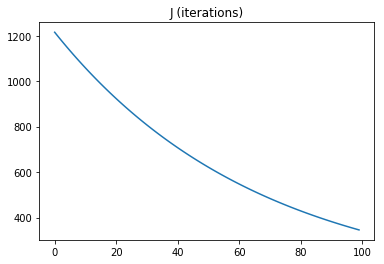

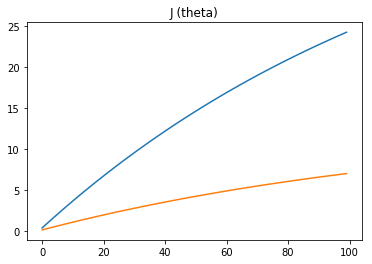

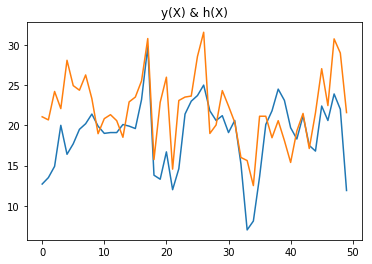

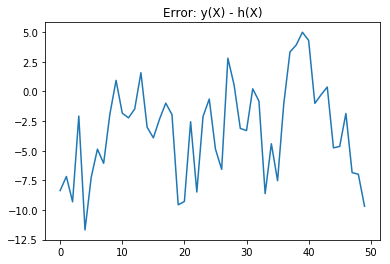

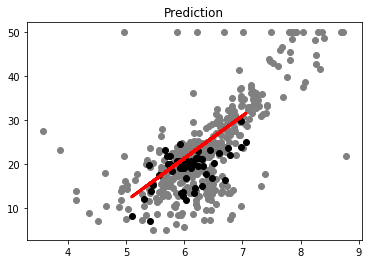

In [8]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import *

def linearRegression(dataset_x_training, dataset_x_testing, dataset_y_training, dataset_y_testing, alpha, iterations):
    
    # Normalitzem les dades d'entrenament
    mean = np.mean(dataset_x_training, axis=0)
    std = np.std(dataset_x_training, axis=0)
    normalized_dataset_x_training = (dataset_x_training - mean) / std
    print("Mean: ", mean)
    print("Std: ", std)

    # Plot de les dades d'entrenament (normalitzades)
    plt.scatter(normalized_dataset_x_training, dataset_y_training, color='grey')
    plt.title("Training data (normalized)")
    plt.show()

    # Mida dels sets d'entrenament i de testing
    m = dataset_x_training.shape[0]
    m_testing = dataset_x_testing.shape[0]

    # Generem una columna de 1s
    ones = np.ones([m, 1])
    
    # Amb la funció hstack, concatenem les dues columnes, la de uns i la de les x
    normalized_dataset_1x_training = np.hstack((ones.reshape(m, 1), normalized_dataset_x_training.reshape(m, 1)))

    # Quantitat de theta's amb les que "jugarem" per tal de minimitzar la funció de cost
    thetas = normalized_dataset_1x_training.shape[1]

    # Array de theta's amb les que "jugarem" per tal de minimitzar la funció de cost
    theta = np.zeros([1, thetas])

    # Array per anar guardant els valors que va prenent la funció de cost a mesura que es va iterant
    cost_values = np.zeros((1, iterations))

    # Matriu per anar guardant els valors que van prenent les theta's a mesura que es va iterant
    theta_values = np.zeros((iterations, thetas))

    x = normalized_dataset_1x_training
    y = dataset_y_training.reshape(m, 1)

    # Algoritme del gradient
    for i in range(0, iterations):

        # Matriu amb les diferències
        difference = x * theta - y

        # Sumem en una direcció, obtenint un array
        added = difference.sum(axis=1)

        # Assegurem la mida del array
        array = ((x * theta - y)).sum(axis=1).reshape(m, 1)

        # Per cada theta (en el nostre cas, theta0 i theta1)
        for j in range(0, thetas):

            # Derivada parcial
            partial = sum(array * (x[:, j].reshape(m, 1))) * (1 / m)

            # Movem les theta's 
            theta[0, j] = theta[0, j] - alpha * partial;

        # Calculem el valor de la funció de cost en aquesta iteració i el guardem
        hipothesis = (x * theta - y).sum(axis=1).reshape(m, 1)
        cost_values[0, i] = sum(hipothesis ** 2) * ( float(1) / (m * 2) )

        # Guardem els valors que tenen les theta's a en aquesta iteració
        theta_values[i, :] = theta

    print("Theta: ", theta)

    # Plot J(iterations)
    x = np.arange(iterations).reshape([iterations, 1])# Des de 0 fins a iterations
    fx = cost_values.reshape([iterations, 1])
    plt.plot(x, fx)
    plt.title("J (iterations)")
    plt.show()

    # Gràfic de la funció de cost en funció de les theta's (J(theta))
    # Pintem tantes corbes com thetas
    for j in range(0, thetas):
        x = np.arange(iterations).reshape((iterations, 1))
        fx = theta_values[:,j].reshape((iterations, 1))
        plt.plot(x, fx)
    plt.title("J (theta)")
    plt.show()

    # Gràfic de y(X) & h(X)
    ones = np.ones((m_testing, 1));# Generem una columna de 1s
    normalized_dataset_x_testing = (dataset_x_testing - mean) / std# Normalitzem les dades de prova
    hstacked = np.hstack((ones.reshape(m_testing, 1), normalized_dataset_x_testing.reshape(m_testing, 1)))# Concatenem la columna de 1s generada amb les dades de prova normalitzades
    hx = (hstacked * theta).sum(axis = 1).reshape((m_testing, 1))# Calculem h(X)
    x1 = np.arange(m_testing).reshape((m_testing, 1))
    fx1 = dataset_y_testing.reshape((m_testing, 1))
    x2 = np.arange(m_testing).reshape((m_testing, 1))
    fx2 = hx.reshape((m_testing, 1))
    plt.plot(x1, fx1)
    plt.plot(x2, fx2)
    plt.title("y(X) & h(X)")
    plt.show()

    # Gràfic de l'error (y(X) - h(X))
    x = np.arange(m_testing).reshape((m_testing, 1))
    fx = dataset_y_testing.reshape((m_testing, 1)) - hx.reshape((m_testing, 1))
    plt.plot(x, fx)
    plt.title("Error: y(X) - h(X)")
    plt.show()
    
    # Última gràfica. Aquesta exemplifica el resultat de la regressió lineal:
    # conté la predicció dels preus així com les dades d’entrenament utilitzades 
    # i les dades reals de preus
    plt.scatter(dataset_x_training, dataset_y_training, color = 'grey')
    plt.scatter(dataset_x_testing, dataset_y_testing, color = 'black')
    plt.plot(dataset_x_testing, hx, color = 'red', linewidth = 3)
    plt.title("Prediction")
    plt.show()
    
    return

# Primera part de la pràctica
# Utilitzarem el dataset ”Boston” que ens proporciona la llibreria sklearn
# Aquest ens permetrà predir el preu d’un habitatge a partir de diverses característiques o atributs
# Per a aquesta pràctica ens interessa només un atribut, que és el nombre d'habitacions

# Carreguem el dataset de Boston
dataset = datasets.load_boston()

# Ens interessa només un atribut, que és el nombre d'habitacions
# Voldrem conèixer el preu en funció d'aquest atribut
# És el número d'habitacions pero fent un promig amb altres atributs, per això surt decimal
dataset_x = dataset.data[:, np.newaxis, 5]

# Part de les dades seran per entrenar i la resta seran per fer testing
# Dediquem les darreres 50 mostres pel testing (està bé?????????????????????????????????????)
dataset_x_training = dataset_x[:-50]
dataset_x_testing = dataset_x[-50:]

# Preus de les cases
dataset_y_training = dataset.target[:-50]
dataset_y_testing = dataset.target[-50:]

# Regressió lineal
linearRegression(dataset_x_training, dataset_x_testing, dataset_y_training, dataset_y_testing, 0.0075, 100)

Mean:  55.712253098979595
Std:  24.784066623916985


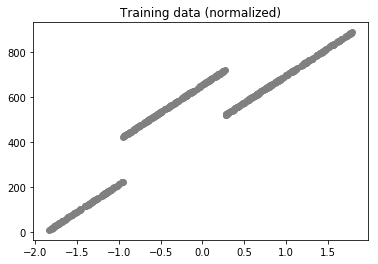

Theta:  [[555.36952471 231.53422724]]


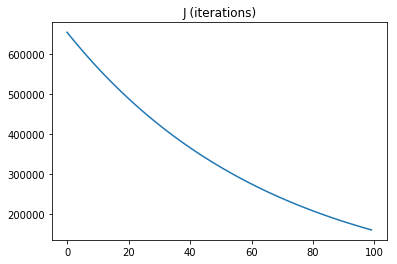

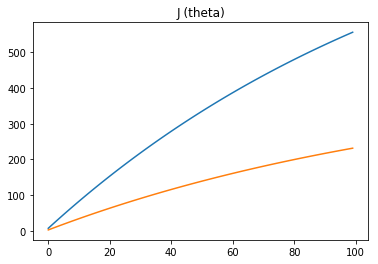

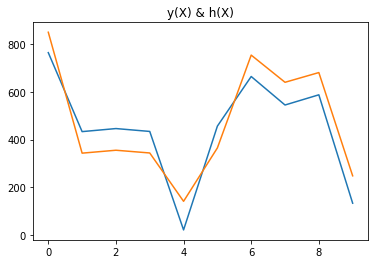

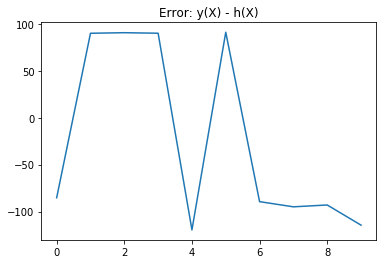

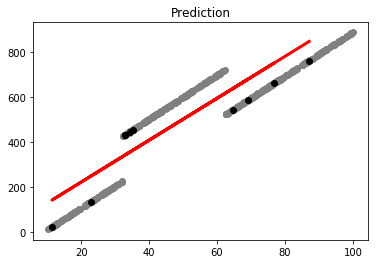

In [9]:
# Segona part de la pràctica
# Es tracta d’usar el mateix algoritme per predir la constant elàstica d’una molla
# Utilitzarem les dades guardades en el csv pel programa de Processing
import csv
ifile = open("data.csv", "r")
reader = csv.reader(ifile, delimiter=",")

rownum = 0	
x = []
y = []

for row in reader:
    if(rownum != 0):
        x.append (row[0])
        y.append (row[1])
    rownum += 1

ifile.close();

import numpy as np

dataset_x_training = np.array(x).astype(np.float)[:-10]
dataset_x_testing = np.array(x).astype(np.float)[-10:]

dataset_y_training = np.array(y).astype(np.float)[:-10]
dataset_y_testing = np.array(y).astype(np.float)[-10:]


# Regressió lineal
linearRegression(dataset_x_training, dataset_x_testing, dataset_y_training, dataset_y_testing, 0.0075, 100)